# Sheet 2 - Simulation exercise (Gaussian mixture model - Gibbs sampling) 

In [1]:
using Distributions, StatsPlots, Plots, StatsBase
pyplot()

Plots.PyPlotBackend()

## Sample synthetic dataset from mixture model.

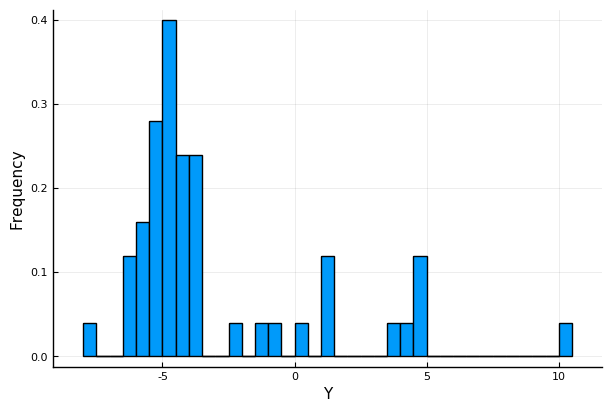

In [108]:
mu    = [-5,0,5]
sigma2= [1,2,3]
p     = [0.5,0.2,0.3]
w = Weights(p)
M = 50
X = zeros(M)
s = sample(1:3, w,M)
for i = 1:M
    j = s[i]
    X[i]+= rand(Normal(mu[j],sigma2[j]))
end

p = histogram(X,xlabel="Y",ylabel="Frequency",normalize=true,legend=false,nbins=M)
savefig(p,"./images/Ex6.png")

### Initial step:
* Sample from prior p      ~ Dirichlet
* Sample from prior μk     ~ N(m, tau^2)
* Sample from prior sig2_k ~ IG(alpha, beta)

### After that, sample from the full conditionals:
* Sample Z | p, mu, sig2 , Y ~ P(Z_i = k | p) = p_k
* Sample p1,...,pk | Z, mu, sig2, Y ~ Dirichlet (gamma1 + n1,...,gammak + nk)
* Sample sig2_1,...,sig2_k | Z, mu, p, Y $\sim
\text{Inverse Gamma}\left(
\alpha + \frac{n_k}{2}, \beta +
\frac{\sum_{i=1}^{n_k}(x_i - \mu_k)^2}{2}
\right)
$
* Sample mu_1, ... , mu_k | Z, sig2, p, Y$ \sim
N\left(
\frac{n_k \sigma_k ^{-2}\bar{x_k} + \tau^{-2}m}
{n_k\sigma^2_k}
, [n_k\sigma_k^{-2} + \tau^{-2}]^{-1}
\right)$

In [151]:
k = 3
gamma, m, tau, alpha, beta = [1,1,1],0,1,3,1

function SamplePosterior_Z(p,M)
    z = sample(1:3, Weights(p),M);
    return z
end

function SamplePosterior_p(z, gamma)
    n = countmap(z)
    for i = 1:k
        try
            gamma[i] += n[i]
        catch
        end
    end
    p = rand(Dirichlet(gamma))
    return p
end

function SamplePosterior_sigma(z,mu,alpha,beta,y)
    sig = zeros(k)
    n = countmap(z)
    for i = 1:k
        alpha_p = alpha
        try
            alpha_p = alpha + n[i]/2
        catch
            alpha_p = alpha
        end
        beta_p  = beta + sum((y[z .== 1].-mu[i]).^2)/2
        sig[i] = rand(InverseGamma(alpha_p,beta_p^-1))
    end
    return sig
end

function SamplePosterior_mu(z,m,tau,sig)
    mu = zeros(k)
    n = countmap(z)
    for i = 1:k
        m_p = m
        tau_p = tau
        try
            m_p = (n[i]*(sig[i]^(-1))*(sum(X[z .== 1])/n[i])+(tau^(-1))*m)/(n[i]*(sig[i]^(-1)+(tau^(-1))))
            tau_p = (n[i]*(sig[i]^(-1))+(tau^(-1)))^-1
        catch
            m_p = m
            tau_p = tau
        end
        mu[i]   = rand(Normal(m_p,tau_p))
    end
    return mu
end


function Gibbs_Sampler_Mixture(steps,y,k,gamma,m,tau,alpha,beta)
    #Initilialize by sampling from the priors
    p   = rand(Dirichlet(gamma))
    mu  =rand(Normal(m,tau),k)
    sig = rand(InverseGamma(alpha,beta^-1),k)
    
    # Start the updating
    posterior = zeros(steps,k*3)
    for i = 1:steps
        z = SamplePosterior_Z(p,M);
        p = SamplePosterior_p(z,gamma)
        sig = SamplePosterior_sigma(z,mu,alpha,beta,y)
        mu  = SamplePosterior_mu(z,m,tau,sig)
        posterior[i,:] = posterior[i,:] + vcat(p,mu,sig)
    end
    return posterior
end

steps = 1_000
y     = X
simulation = Gibbs_Sampler_Mixture(steps,y,k,gamma,m,tau,alpha,beta);


LoadError: syntax: missing comma or ) in argument list

In [146]:
mu    = [-5,0,5]
sigma2= [1,2,3]
p     = [0.5,0.2,0.3]
X
function SamplePosterior_Z(p,M,mu,sig,y)
    z = zeros(M)
    for n =1:M
        w = zeros(k)
        for i=1:k
            w[i] = p[i]*pdf(Normal(mu[i],sqrt(sig[i])),y[n])
        end
        z[n] = sample(1:3, Weights(w))
    end
    return z
end

SamplePosterior_Z(p,10,mu,sigma2,X)


10-element Array{Float64,1}:
 1.0
 2.0
 2.0
 1.0
 2.0
 1.0
 1.0
 1.0
 1.0
 2.0

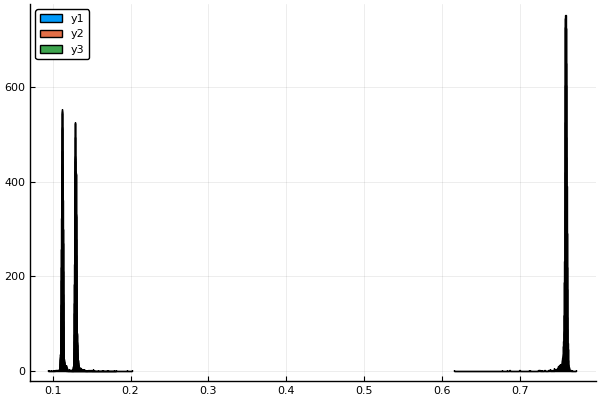

In [118]:
# histogram(simulation[:,4])
# histogram(simulation[:,5])
# histogram(simulation[:,6])
histogram(simulation[:,1])
histogram!(simulation[:,2])
histogram!(simulation[:,3])

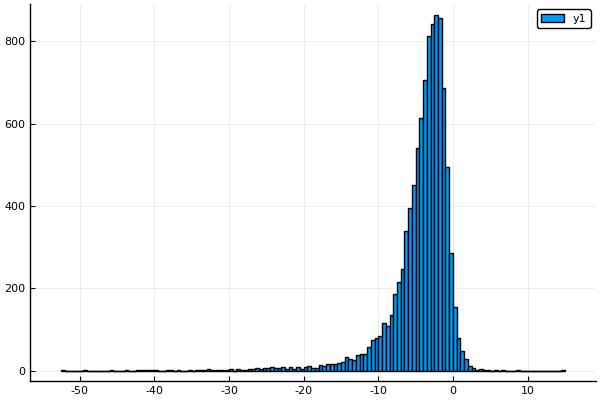

In [125]:
histogram(simulation[:,4])
# histogram!(simulation[:,5])
# histogram!(simulation[:,6])
# matr= zeros(1,9)
# matr[1,:] + vcat(rand(3),rand(3),rand(3))

In [205]:
k = 3
gamma, m, tau, alpha, beta = [1,1,1],0,1,3,1
# function Priors(gamma,m,tau,alpha,beta)
#     rand(Dirichlet())
# end

function Posterior_p(Z,mu,sig2,Y)
    
end

Posterior_p (generic function with 1 method)

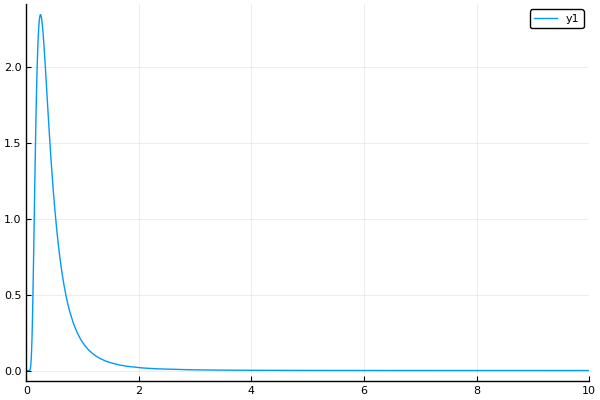

In [129]:
plot(InverseGamma(alpha,beta^-1),xlims=(0,10))